# 28 实现strStr
给定一个 haystack 字符串和一个 needle 字符串，在 haystack 字符串中找出 needle 字符串出现的第一个位置 (从0开始)。如果不存在，则返回  -1。

示例 1: 输入: haystack = "hello", needle = "ll" 输出: 2

示例 2: 输入: haystack = "aaaaa", needle = "bba" 输出: -1

说明: 当 needle 是空字符串时，我们应当返回什么值呢？这是一个在面试中很好的问题。 对于本题而言，当 needle 是空字符串时我们应当返回 0 。这与C语言的 strstr() 以及 Java的 indexOf() 定义相符。

## KMP
- 应用在字符串匹配上的算法，又K M P三位学者发明的

### 主要思想
当出现字符串不匹配时，记录好一部分之前已经匹配的文本内容，就可以利用这些信息避免从头开始匹配  

重点：**如何记录已经匹配的文本的内容**

#### 前缀表
- 用来回退，当 *模式串* 和 *文本串* 不匹配的时候，模式串应该从哪里开始重新匹配  
  - 模式串：目标字符串  needle
  - 文本串：输入的原始字符串  haystack

也就是说在某个字符匹配失败的时候，前缀表要能够告诉index：  
**下一步模式串要回到哪个字符开始匹配**

前缀表要记录的内容：  
**下标i及其之前的字符串中，有多大长度的相同前缀和后缀**  
- 前缀：不包含最后一个字符的，所有以第一个字符开头的连续字串  
- 后缀：不包含第一个字符的，所有以最后一个字符结尾的连续子串  
- 最长相等前后缀：前缀和后缀相等的的最长的长度  

#### 如何计算前缀表
- 对模式串的每一个前缀字串求其 *最长相等前后缀*  
- 得到和模式串长度相等的表即为前缀表 
- 表中每个元素表示：该下标及其之前的字符串中，有多大长度相同的前缀和后缀   
- 此类推： 长度为前4个字符的子串aaba，最长相同前后缀的长度为1。 长度为前5个字符的子串aabaa，最长相同前后缀的长度为2。 长度为前6个字符的子串aabaaf，最长相同前后缀的长度为0。
- 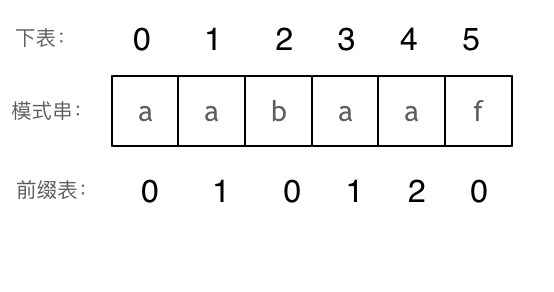

#### 寻找重新匹配的位置
- 出现不匹配的字符  
- 看该字符前一个字符的前缀表数值，确定前面字符串的最长相同的前缀和后缀  
- 前一个字符的前缀表数值是多少，模式串的index就移动到该下标对应的位置继续匹配  

#### 构造next数组
其实就是计算模式串s和前缀表的过程：
- 初始化  
- 处理前后缀不相同的情况  
- 处理前后缀相同的情况 

In [ ]:
# 减1 版
class Solution:
    def getNext(self, next, s):
    # 根据模式串 s 获取前缀表
        j = -1   # 初始化
        next[0] = j
        for i in range(1, len(s)):
            while j >= 0 and s[i] !=s[j+1]:
                j = next[j]  #  s[i] 与 s[j+1] 不相同，就要找 j+1前一个元素在next数组里的值（就是next[j]）
            if s[i] == s[j+1]:
                j += 1
            next[i] = j
    
    def strStr(self, haystack:str, neddle:str) -> int:
        if not neddle:
            return 0    # 模式串为空时返回 0
        next = [0] * len(neddle)
        self.getNext(next, neddle)
        j = -1
        for i in range(len(haystack)):
            while j >= 0 and haystack[i] != neddle[j+1]:
                j = next[j]  # 不匹配，回退
            if haystack[i] == neddle[j+1]:
                j += 1
            if j == len(neddle) - 1:
                return i - len(neddle) + 1
        return -1

In [ ]:
# 不减 1 版
class Solution:
    def getNext(self, next: List[int], s: str) -> None:
        j = 0   # j 记录前缀和后缀的最大相等长度
        next[0] = 0
        for i in range(1, len(s)):   # j 从0开始，i 从1开始
            while j >0 and s[i] != s[j]:
                j = next[j - 1]   # 字符不匹配，回退到j-1开始匹配
            if s[i] == s[j]:
                j += 1   # 匹配成功长度 +1
            next[i] = j
    
    def strStr(self, haystack: str, needle: str) -> int:
        if len(neddle) == 0:
            return 0
        
        next = [0] * len(neddle)
        self.getNext(next, neddle)
        j = 0
        for i in range(len(haystack)):
            while j > 0 and haystack[i] != needle[j]
            j = next[j -1]
            if haystack[i] == neddle[j]:
                j += 1  # 匹配成功长度 +1
            if j == len(needle):   # j完全遍历needle证明已经匹配完成
                return i - len(needle) + 1   # 返回模式串的初始字符下标
            
        return -1

In [ ]:
# 法3：暴力法
# 直接把文本串切片匹配，返回匹配的第一个下标
class Solution:
    def strStr(self, haystack, needle):
        m, n = len(haystack), len(needle)
        for i in range(m):
            if haystack[i:i+n] == needle:
                return i
        return -1

In [ ]:
# 法4：使用index
# index(): python字符串的内置方法，用于查找子串在主串中第一次出现的索引位置
class Solution:
    def strStr(self, haystack, needle):
        try:
            return haystack.index(needle)
        except ValueError:
            return -1

In [ ]:
# 使用find
# find()未找到字串时直接返回-1，找到则返回第一次出现的索引
class Solution:
    def strStr(self, haystack: str, needle: str) -> int:
        return haystack.find(needle)